# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


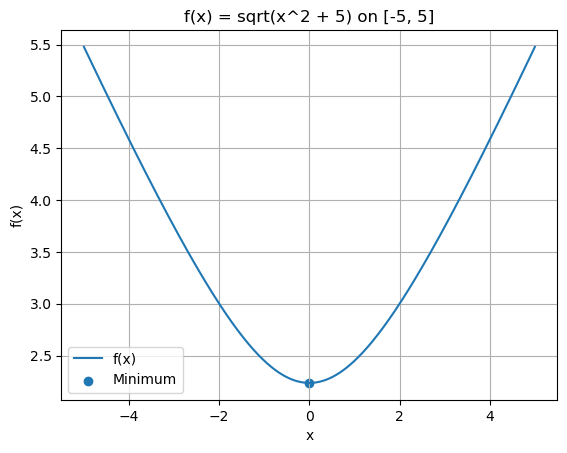

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).

def f(x):
    """
    f(x) = sqrt(x^2 + 5)
    Input:
        x: real number or numpy array
    Output:
        function value
    """
    return np.sqrt(x**2 + 5)
    
# Plot the function f(x), np.linspace might be helpful.

x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.scatter(0, np.sqrt(5))  # Minimum point
plt.title("f(x) = sqrt(x^2 + 5) on [-5, 5]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "Minimum"])
plt.grid(True)
plt.show()


x0 (initial guess) = 2.8
x_T (final x after 50 iterations) = 7.136039372775195e-13
f(x_T) (approx minimum value) = 2.23606797749979


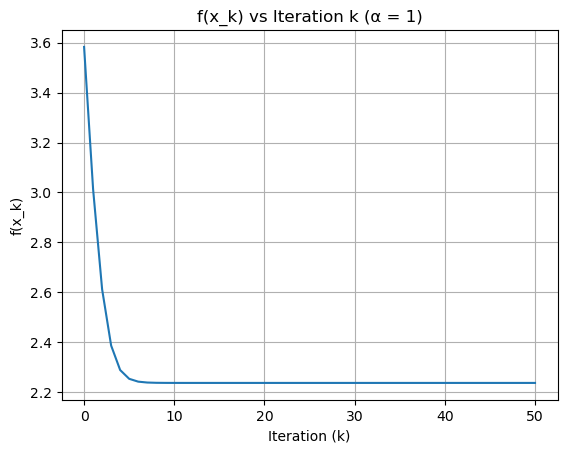

In [26]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):

    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

def run_gd(x0, step_size, num_iterations=50):
    """
    Runs the Gradient Descent Algorithm
    """
    x = x0
    x_k_values = [x]

    for k in range(num_iterations):
        x = x - step_size * grad_f(x)
        x_k_values.append(x)

    return np.array(x_k_values)


# set up/assign initial values

SB_ID_LAST_DIGIT = 9  
x0 = SB_ID_LAST_DIGIT / 5 + 1  # Initial guess rule

print("x0 (initial guess) =", x0)

# Run gradient descent by calling the function

trajectory = run_gd(x0, step_size=1, num_iterations=50)
x_T = trajectory[-1]


# report x_T by printing out the value
print("x_T (final x after 50 iterations) =", x_T)
print("f(x_T) (approx minimum value) =", f(x_T))



# Plot the f(x_k) values vs. iteration number
f_vals = f(trajectory)

plt.plot(range(len(f_vals)), f_vals)
plt.title("f(x_k) vs Iteration k (α = 1)")
plt.xlabel("Iteration (k)")
plt.ylabel("f(x_k)")
plt.grid(True)
plt.show()



Step sizes to test = [5, 3, 1, 0.5]
α=5: f(x) always decreasing? → False
α=3: f(x) always decreasing? → False
α=1: f(x) always decreasing? → False
α=0.5: f(x) always decreasing? → True


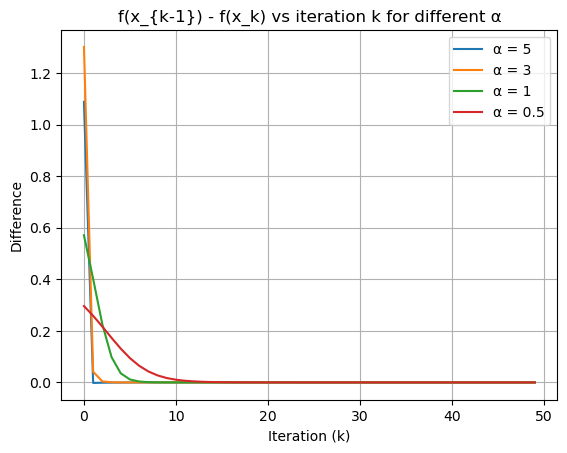

In [5]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]
print("Step sizes to test =", step_sizes)


# initialize a list to store the results from different step sizes

gd_results = {}

# loop through the step sizes and perform GD and record results

for α in step_sizes:
    gd_results[α] = run_gd(x0, step_size=α, num_iterations=50)
    
# plot multiple curves in a single graph
plt.figure()

for α, traj in gd_results.items():
    f_values = f(traj)
    diffs = f_values[:-1] - f_values[1:]  # f(x_{k-1}) - f(x_k)
    plt.plot(range(len(diffs)), diffs, label=f"α = {α}")

    # Check if function is always decreasing
    always_decreasing = np.all(diffs > 0)
    print(f"α={α}: f(x) always decreasing? → {always_decreasing}")

plt.title("f(x_{k-1}) - f(x_k) vs iteration k for different α")
plt.xlabel("Iteration (k)")
plt.ylabel("Difference")
plt.legend()
plt.grid(True)
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(95)   # the last two digits of SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

print("Synthetic data generated")
print("Shape of X =", X.shape)
print("First 5 rows of X:\n", X[:5])
print("First 5 y values:\n", y[:5])

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]

print("Bias column added")
print("First 5 rows after adding bias:\n", X_b[:5])

# Find theta using the normal equation
theta = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

print("Theta computed using normal equation")


# Print the intercept and coefficients of the regression plane
intercept = theta[0]
coefficients = theta[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Plot the generated data and the regression plane



Synthetic data generated
Shape of X = (100, 2)
First 5 rows of X:
 [[0.45760698 0.38137604]
 [1.77271934 1.43785179]
 [1.06596677 1.7389242 ]
 [1.44847535 0.96417398]
 [1.51215439 1.94947999]]
First 5 y values:
 [ 5.78525346 12.33588926  8.71203772  9.77740548 11.30603881]
Bias column added
First 5 rows after adding bias:
 [[1.         0.45760698 0.38137604]
 [1.         1.77271934 1.43785179]
 [1.         1.06596677 1.7389242 ]
 [1.         1.44847535 0.96417398]
 [1.         1.51215439 1.94947999]]
Theta computed using normal equation
Intercept: 4.1024630912110585
Coefficients: [3.95217219 0.33958936]


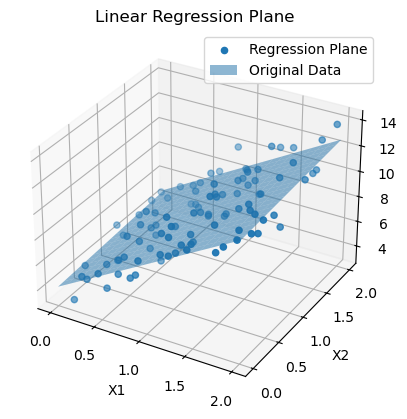

In [30]:
x1 = np.linspace(0, 2, 20)
x2 = np.linspace(0, 2, 20)
X1, X2 = np.meshgrid(x1, x2)

Z = intercept + coefficients[0] * X1 + coefficients[1] * X2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

ax.plot_surface(X1, X2, Z, alpha=0.5)

ax.set_title("Linear Regression Plane")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

plt.legend(["Regression Plane", "Original Data"])
plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate training and testing datasets

np.random.seed(95)

m = 200

X = 4 * (np.random.rand(m, 2) - 0.5)

true_theta = np.array([0.8, -1.2]) 

# Generate labels with noise
logits = X @ true_theta + 0.3 * np.random.randn(m)
probs = sigmoid(logits)
y = (probs > 0.5).astype(int)

# Train/test split
split = int(0.8 * m)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# Set hyperparameters and initialize parameters

learning_rate = 0.5  
num_epochs = 50     


theta = np.random.randn(2) 
bias = 0.0  #intercept

print("Initial theta (weights) =", theta)
print("Initial bias =", bias)
print("Learning rate =", learning_rate, "| epochs =", num_epochs)


Initial theta (weights) = [ 1.97057055 -0.01073257]
Initial bias = 0.0
Learning rate = 0.5 | epochs = 50


In [36]:
# Start training

train_loss = []
train_pred_history = []

for epoch in range(num_epochs):
    z = X_train @ theta + bias
    y_hat = sigmoid(z)

    loss = -np.mean(y_train * np.log(y_hat + 1e-9) + (1 - y_train) * np.log(1 - y_hat + 1e-9))

    grad_theta = (1/split) * X_train.T @ (y_hat - y_train)
    grad_bias = np.mean(y_hat - y_train)

    theta -= learning_rate * grad_theta
    bias -= learning_rate * grad_bias

    train_loss.append(loss)
    train_pred = (y_hat > 0.5).astype(int)
    train_pred_history.append(train_pred)

    print(f"Epoch {epoch+1}/{num_epochs} | loss = {loss:.4f}")

train_pred_history = np.array(train_pred_history)
print("Training complete Final theta =", theta, "| bias =", bias)


Epoch 1/50 | loss = 0.7767
Epoch 2/50 | loss = 0.6404
Epoch 3/50 | loss = 0.5321
Epoch 4/50 | loss = 0.4479
Epoch 5/50 | loss = 0.3836
Epoch 6/50 | loss = 0.3350
Epoch 7/50 | loss = 0.2984
Epoch 8/50 | loss = 0.2707
Epoch 9/50 | loss = 0.2496
Epoch 10/50 | loss = 0.2332
Epoch 11/50 | loss = 0.2204
Epoch 12/50 | loss = 0.2101
Epoch 13/50 | loss = 0.2017
Epoch 14/50 | loss = 0.1948
Epoch 15/50 | loss = 0.1890
Epoch 16/50 | loss = 0.1840
Epoch 17/50 | loss = 0.1797
Epoch 18/50 | loss = 0.1759
Epoch 19/50 | loss = 0.1726
Epoch 20/50 | loss = 0.1696
Epoch 21/50 | loss = 0.1669
Epoch 22/50 | loss = 0.1644
Epoch 23/50 | loss = 0.1621
Epoch 24/50 | loss = 0.1600
Epoch 25/50 | loss = 0.1580
Epoch 26/50 | loss = 0.1562
Epoch 27/50 | loss = 0.1544
Epoch 28/50 | loss = 0.1528
Epoch 29/50 | loss = 0.1512
Epoch 30/50 | loss = 0.1498
Epoch 31/50 | loss = 0.1484
Epoch 32/50 | loss = 0.1470
Epoch 33/50 | loss = 0.1457
Epoch 34/50 | loss = 0.1445
Epoch 35/50 | loss = 0.1433
Epoch 36/50 | loss = 0.1421
E

Training Accuracy = 0.99375
Testing Accuracy = 0.95


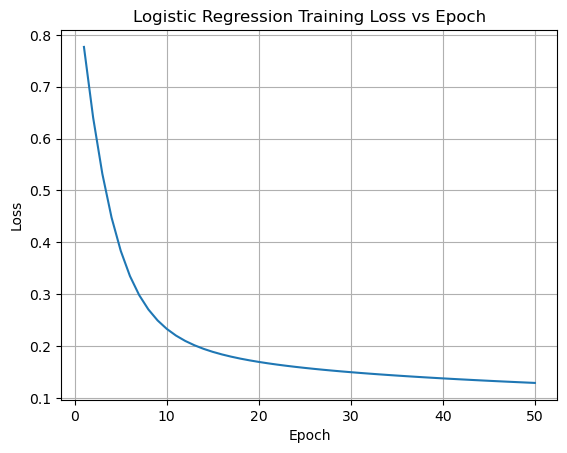

In [15]:
# Calculate training and testing accuracy
y_train_final_hat = (sigmoid(X_train @ theta + bias) > 0.5).astype(int)
train_acc = np.mean(y_train_final_hat == y_train)

# Test
y_test_final_hat = (sigmoid(X_test @ theta + bias) > 0.5).astype(int)
test_acc = np.mean(y_test_final_hat == y_test)

print("Training Accuracy =", train_acc)
print("Testing Accuracy =", test_acc)

# Plot the training dataset and regression decision boundary
plt.plot(range(1, len(train_loss)+1), train_loss)
plt.title("Logistic Regression Training Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()



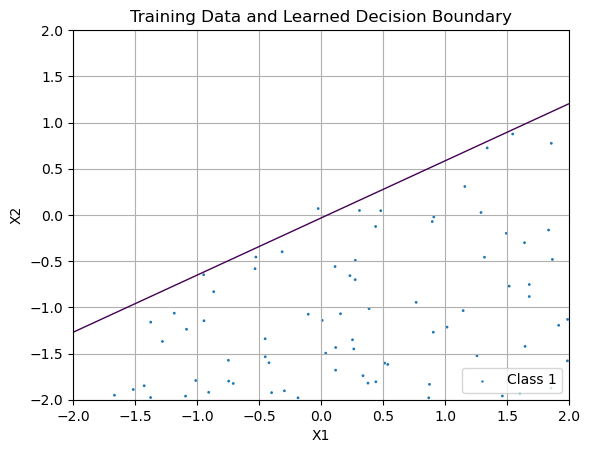

In [17]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = X1 * theta[0] + X2 * theta[1] + bias

# Plot data
plt.scatter(X_train[:,0], X_train[:,1], y_train)
plt.contour(X1, X2, Z, levels=[0], linewidths=1)

plt.title("Training Data and Learned Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["Class 1", "Class 0", "Decision Boundary"])
plt.grid(True)
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5